In [158]:
#Question 1

In [159]:
#Part a

import numpy as np
import pandas as pd

def get_matrix(coupons, A):
    for i in range(0, len(A[0])):
        for j in range(0, len(A[0])):
            if ((i!= j and i > j)):
                A[i, j] = coupons[i]*1000*0.5
            elif (i == j):
                if (i == 0 and j == 0):
                    A[i, j] = 1000 + coupons[i]*1000*0.5
                else:
                    A[i, j] = 1000 + A[i, j - 1]
            else:
                A[i, j] = 0
                
    return A
    
def get_term_structures(n, m):
    x= np.zeros(n)      
    
    for i in range(0, n):
        tmp = y[i]
        for j in range(0, i):
            tmp -= x[j]*A[i, j] 
        x[i]= tmp/A[i, i]

    term_structures = np.multiply(-1/m, np.log(x))
    
    return term_structures

In [160]:
#Part b

def get_forward_rates(n, m, term_structures):
    forward_rates = []
    
    for i in range(0, n - 1):
        forward_rate = (term_structures[i + 1]*(m[i] + 0.5) - term_structures[i] * m[i])/(0.5)
        forward_rates.append(forward_rate)
        
    return forward_rates

In [180]:
#Part c

A = np.zeros([4, 4])

data1 = {"A": [0.5, 985.86, 0.02], "B": [1, 974.70, 0.03], "C": [1.5, 967.99, 0.04], "D": [2, 966.82, 0.05]}
df = pd.DataFrame(data1, index = ["Maturity", "Price", "Coupon"])

m = np.arange(0.5, 2.5, 0.5)

y = np.array(df.loc["Price"])
n = len(y)

coupons = np.array(df.loc["Coupon"])

matrix = get_matrix(coupons, A)
print("Matrix:"")
print(matrix, "\n")

term_structures = get_term_structures(n, m)
data2 = {"Term Structures": term_structures, "m": m}
print(pd.DataFrame(data2), "\n")

forward_rates = get_forward_rates(n, m, term_structures)
data3 = {"Forward Rates": forward_rates, "m": m[:3]}
print(pd.DataFrame(data3))

Matrix:
[[1010.    0.    0.    0.]
 [  15. 1015.    0.    0.]
 [  20.   20. 1020.    0.]
 [  25.   25.   25. 1025.]] 

   Term Structures    m
0         0.048383  0.5
1         0.055650  1.0
2         0.061904  1.5
3         0.067261  2.0 

   Forward Rates    m
0       0.062917  0.5
1       0.074414  1.0
2       0.083329  1.5


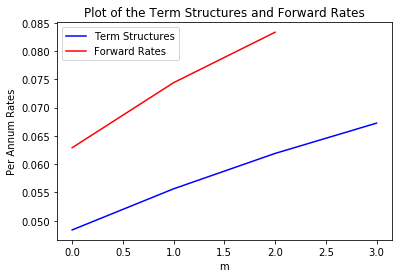

In [162]:
#Part d

import matplotlib.pyplot as plt

plt.plot(term_structures, label = "Term Structures", color = 'blue')
plt.plot(forward_rates, label = "Forward Rates", color = 'red')

plt.xlabel("m")
plt.ylabel("Per Annum Rates")
plt.title("Plot of the Term Structures and Forward Rates")
plt.legend()

plt.show()

In [163]:
#Question 2

Prices per $1 Face Value:
[[0.94728365 0.87792934 0.80344972 0.73077468 0.6635438  0.60328802
  0.55030368 0.50423019 0.46440336 0.43005815]
 [0.95675648 0.89618147 0.82973635 0.76436905 0.70377361 0.64955071
  0.60206941 0.56103822 0.52585543 0.4958108 ]
 [0.96622932 0.9144336  0.85602298 0.79796343 0.74400342 0.6958134
  0.65383514 0.61784625 0.58730749 0.56156344]
 [0.97570215 0.93268573 0.8823096  0.8315578  0.78423324 0.74207609
  0.70560087 0.67465428 0.64875956 0.62731609]
 [0.98517499 0.95093786 0.90859623 0.86515217 0.82446305 0.78833878
  0.7573666  0.73146231 0.71021162 0.69306874]
 [0.99464783 0.96918999 0.93488286 0.89874655 0.86469286 0.83460148
  0.80913233 0.78827034 0.77166368 0.75882138]
 [1.00412066 0.98744212 0.96116948 0.93234092 0.90492267 0.88086417
  0.86089806 0.84507837 0.83311575 0.82457403]
 [1.0135935  1.00569425 0.98745611 0.9659353  0.94515248 0.92712686
  0.91266379 0.9018864  0.89456781 0.89032667]
 [1.02306634 1.02394638 1.01374274 0.99952967 0.9853823

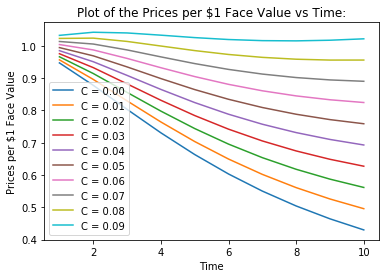

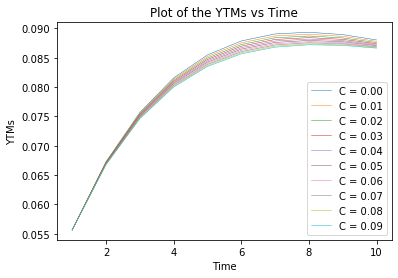

In [188]:
import scipy.optimize as optimize

def bond_ytm(price, FaceVal, T, coup, freq = 2, guess = 0.05):
    freq = float(freq)
    periods = T*freq
    coupon = coup/100.*FaceVal/freq
    dt= [(i + 1)/freq for i in range(int(periods))]
    ytm_func= lambda y: sum([coupon/(1 + y/freq)**(freq*t) for t in dt])+ FaceVal/(1 + y/freq)**periods - price 

    return optimize.newton(ytm_func, guess)

def get_term_structure(N, B0, B1, B2, tau, T):
    r1 = B0 + ((B1 + B2)*(tau/T)*(1 - np.exp(-T/tau))) - (B2 * np.exp(-T/tau))
    Z = 1/((1 + r1)**T)
    
    return Z

def get_prices_per_dollar(N, Z, coupons, F):
    coupons = 0.01*coupons
    prices_per_dollar = np.zeros([N, N])
    for i in range(1, N + 1):
        prices_per_dollar[:, i - 1] = np.sum(Z[0:i - 1])*coupons + Z[i - 1]*(F + coupons)
    
    return prices_per_dollar
    
def get_YTMs(N, coupons, price_per_dollar, T):
    YTMs = np.zeros([N, N])
    for i in range (0, N):
        for j in range(0, N):
            YTMs[j, i] = bond_ytm(price_per_dollar[j, i], 1, T[i], coupons[j], freq = 1)
        
    return YTMs

N = 10
B0 = 0.02
B1 = 0.02
B2 = 0.20
tau = 5
T = np.arange(1, N + 1, 1)
Z = get_term_structure(N, B0, B1, B2, tau, T)

F = 1
coupons = np.arange(0, 10, 1)
prices_per_dollar = get_prices_per_dollar(N, Z, coupons, F)
print("Prices per $1 Face Value:")
print(prices_per_dollar, "\n")

YTMs = get_YTMs(N, coupons, price_per_dollar, T)
print("YTMs:")
print(YTMs, "\n")

plt.plot(T, price_per_dollar.T)
plt.title("Plot of the Prices per $1 Face Value vs Time:")
plt.xlabel("Time")
plt.ylabel("Prices per $1 Face Value")
plt.legend(["C = 0.00", "C = 0.01", "C = 0.02", "C = 0.03", "C = 0.04", "C = 0.05", "C = 0.06", "C = 0.07", "C = 0.08", "C = 0.09"])
plt.show()

plt.plot(T, YTMs.T, linewidth = 0.5)
plt.title("Plot of the YTMs vs Time")
plt.xlabel("Time")
plt.ylabel("YTMs")
plt.legend(["C = 0.00", "C = 0.01", "C = 0.02", "C = 0.03", "C = 0.04", "C = 0.05", "C = 0.06", "C = 0.07", "C = 0.08", "C = 0.09"])
plt.show()

In [131]:
#Question 4

In [132]:
#Part a

def get_D_mac(y1, T, c):
    D_mac = 1 + (1/y1) + ((T*(y1 - c) - (1 + y1))/(c*((1 + y1)**T - 1) + y1))
    return D_mac

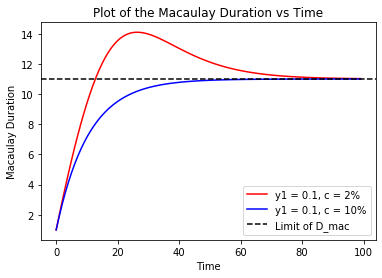

In [184]:
#Part b

y1 = 0.1
T = np.arange(1, 101)

limit_D_mac = 1 + (1/y1)

c1 = 0.02
D_mac1 = get_D_mac(y1, T, c1)

c2 = 0.1
D_mac2 = get_D_mac(y1, T, c2)

plt.plot(D_mac1, label = "y1 = 0.1, c = 2%", color = "red")
plt.plot(D_mac2, label = "y1 = 0.1, c = 10%", color = "blue")
plt.title("Plot of the Macaulay Duration vs Time")
plt.xlabel("Time")
plt.ylabel("Macaulay Duration")
plt.axhline(limit_D_mac, label = "Limit of D_mac", linestyle = "dashed", color = "black")
plt.legend()
plt.show()

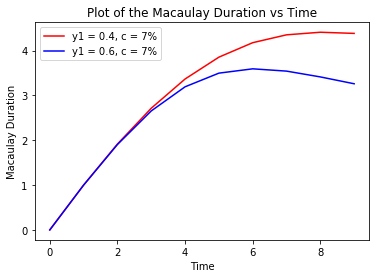

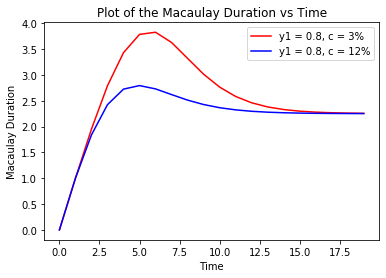

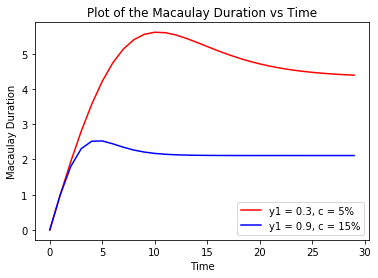

In [185]:
#Part c

T1 = np.arange(0, 10)

D_mac3 = get_D_mac(y1 = 0.4, T = T1, c = 0.07)
D_mac4 = get_D_mac(y1 = 0.6, T = T1, c = 0.07)

T2 = np.arange(0, 20)

D_mac5 = get_D_mac(y1 = 0.8, T = T2, c = 0.03)
D_mac6 = get_D_mac(y1 = 0.8, T = T2, c = 0.12)

T3 = np.arange(0, 30)

D_mac7 = get_D_mac(y1 = 0.3, T = T3, c = 0.05)
D_mac8 = get_D_mac(y1 = 0.9, T = T3, c = 0.15)


plt.plot(D_mac3, label = "y1 = 0.4, c = 7%", color = "red")
plt.plot(D_mac4, label = "y1 = 0.6, c = 7%", color = "blue")
plt.title("Plot of the Macaulay Duration vs Time")
plt.xlabel("Time")
plt.ylabel("Macaulay Duration")
plt.legend()
plt.show()

plt.plot(D_mac5, label = "y1 = 0.8, c = 3%", color = "red")
plt.plot(D_mac6, label = "y1 = 0.8, c = 12%", color = "blue")
plt.title("Plot of the Macaulay Duration vs Time")
plt.xlabel("Time")
plt.ylabel("Macaulay Duration")
plt.legend()
plt.show()

plt.plot(D_mac7, label = "y1 = 0.3, c = 5%", color = "red")
plt.plot(D_mac8, label = "y1 = 0.9, c = 15%", color = "blue")
plt.title("Plot of the Macaulay Duration vs Time")
plt.xlabel("Time")
plt.ylabel("Macaulay Duration")
plt.legend()
plt.show()